# Problem 1
ロジスティック回帰 + L2正則化

学習データを$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$とする。

$$J(w) = \sum_{i=1}^n (\ln (1 + \exp(-y_iw^\top x_i)))  +\lambda w^\top w$$
としたとき、
$$\hat w = \arg\min_w J(w)$$
を求める。解析解は求められないので、最急降下法とニュートン法で上記の最適解を求める。

時刻$t\in\mathbb{N}$における(最急降下法またはニュートン法の)更新を
$$w^{(t+1)} = w^{(t)} + \alpha^{(t)}d^{(t)}$$
とする。今回は簡単のため、$\alpha^{(t)}$は$t$によらない定数とする。(課題資料より)

## 最急降下法
$$d^{(t)} = -\nabla J(w^{(t)})$$



## ニュートン法
$$d^{(t)} = -(\nabla^2 J(w^{(t)}))^{-1} \nabla J(w^{(t)})$$

## データセットの作成
教師データ$(x_i, y_i)_{i=1}^n$
$x_i\in \mathbb{R}^2,\ y_i\in \{-1,1\}$



In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [248]:
from numpy.random import *

seed(1000) # 再現性のためにシード固定
n= 40
omega = randn(1,1) # 境界線の傾きのようなもの
noise = 0.8 * randn(n,1)

x = randn(n,2)
y = 2 * (omega * x[: , 0:1] + x[: , 1:2]   + noise > 0) - 1
# x[:, 0]だと1次元のベクトルが出てきて、行列演算が適用できない。
# x[:,0:1]とすることで0列目をn行1列の行列として抽出できる。

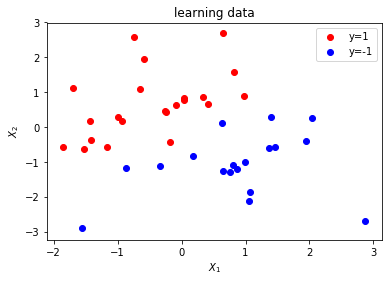

In [249]:
# プロットする

data = list(zip(list(x), list(y)))
# y=-1とy=1でデータセットを分離する

# y=1のデータ
# elem[0]: x, elem[1]: yに相当する。
data_p1 = list(map(lambda elem: elem[0], filter(lambda elem: elem[1] == 1, data)))
# y=-1のデータ
data_m1 = list(map(lambda elem: elem[0], filter(lambda elem: elem[1] == -1, data)))

# xの第1成分と第2成分を分離
data_p1x1 = list(map(lambda elem: elem[0], data_p1))
data_p1x2 = list(map(lambda elem: elem[1], data_p1))
data_m1x1 = list(map(lambda elem: elem[0], data_m1))
data_m1x2 = list(map(lambda elem: elem[1], data_m1))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(data_p1x1,data_p1x2, c='red', label='y=1')
ax.scatter(data_m1x1, data_m1x2, c='blue', label='y=-1')

ax.set_title('learning data')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.legend(loc='upper right')

## 問題点
* 正則化項の$\lambda$をどうするか
* 最急降下法とニュートン法の更新レート$\alpha$をどうするか